# ANN Implementation From Scratch

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7],[8,6,7],[1,2,3]],columns=['cgpa','profile_score','lpa'])

In [3]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7
4,8,6,7
5,1,2,3


In [4]:
def initialize_parameter(layer_dims):
    np.random.seed(3)
    parameters={}
    L=len(layer_dims)

    for l in range(1,L):
        parameters['W'+str(l)]=np.ones((layer_dims[l-1],layer_dims[l]))*0.1
        parameters['b'+str(l)]=np.zeros((layer_dims[l],1))
    return parameters

In [5]:
initialize_parameter([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [6]:
def linear_forward(A_prev,W,b):
    Z=np.dot(W.T,A_prev)+b

    return Z
    

In [7]:
# Forward Propagation
def L_layer_forward(X,parameters):
    A=X
    L=len(parameters)//2

    for l in range(1,L+1):
        A_prev=A
        W1=parameters['W'+str(l)]
        b1=parameters['b'+str(l)]

        # print("A"+str(l-1)+": ",A_prev)
        # print("W"+str(l)+": ",W1)
        # print("b"+str(l)+": ",b1)
        # print("--"*20)

        A=linear_forward(A_prev,W1,b1)
        # print("A"+str(l)+": ",A)
        # print("--"*20)
    return A,A_prev

In [8]:
X=df[['cgpa','profile_score']].values[0].reshape(2,1)
y=df[['lpa']].values[0][0]

In [9]:
X

array([[8],
       [8]], dtype=int64)

In [10]:
y

4

In [11]:
parameters=initialize_parameter([2,2,1])
parameters

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [12]:
y_hat,A1=L_layer_forward(X,parameters)

In [13]:
y_hat=y_hat[0][0]

In [14]:
A1

array([[1.6],
       [1.6]])

In [15]:
def update_parameters(parameters,y,y_hat,A1,X):
    parameters['W2'][0][0]=parameters['W2'][0][0]+(0.001*2*(y-y_hat)*A1[0][0])
    parameters['W2'][1][0]=parameters['W2'][1][0]+(0.001*2*(y-y_hat)*A1[1][0])
    parameters['b2'][0][0]=parameters['b2'][0][0]+(0.001*2*(y-y_hat))

    parameters['W1'][0][0]=parameters['W1'][0][0]+(0.001*2*(y-y_hat)*parameters['W2'][0][0]*X[0][0])
    parameters['W1'][0][1]=parameters['W1'][0][1]+(0.001*2*(y-y_hat)*parameters['W2'][0][0]*X[1][0])
    parameters['b1'][0][0]=parameters['b1'][0][0]+(0.001*2*(y-y_hat)*parameters['W2'][0][0])

    parameters['W1'][1][0]=parameters['W1'][1][0]+(0.001*2*(y-y_hat)*parameters['W2'][1][0]*X[0][0])
    parameters['W1'][1][1]=parameters['W1'][1][1]+(0.001*2*(y-y_hat)*parameters['W2'][1][0]*X[1][0])
    parameters['b1'][1][0]=parameters['b1'][1][0]+(0.001*2*(y-y_hat)*parameters['W2'][1][0])

    


In [16]:
update_parameters(parameters,y,y_hat,A1,X)

In [17]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.00736]])}

In [18]:
# Student 2
X=df[['cgpa','profile_score']].values[1].reshape(2,1)
y=df[['lpa']].values[1][0]


y_hat,A1=L_layer_forward(X,parameters)

In [19]:
y_hat=y_hat[0][0]

In [20]:
update_parameters(parameters,y,y_hat,A1,X)

In [21]:
parameters

{'W1': array([[0.11481311, 0.11716504],
        [0.11481311, 0.11716504]]),
 'b1': array([[0.00199863],
        [0.00199863]]),
 'W2': array([[0.12751067],
        [0.12751067]]),
 'b2': array([[0.01658246]])}

In [22]:
# Student 2
X=df[['cgpa','profile_score']].values[2].reshape(2,1)
y=df[['lpa']].values[2][0]


y_hat,A1=L_layer_forward(X,parameters)

In [23]:
update_parameters(parameters,y,y_hat[0][0],A1,X)

In [24]:
parameters

{'W1': array([[0.12458335, 0.13344878],
        [0.12461077, 0.13349447]]),
 'b1': array([[0.00362701],
        [0.00363158]]),
 'W2': array([[0.1477752 ],
        [0.14818986]]),
 'b2': array([[0.02760173]])}

In [25]:
# Back Propagation

parameters=initialize_parameter([2,2,1])
epochs=40

for i in range(epochs):
    Loss=[]

    for j in range(df.shape[0]):
        X=df[['cgpa','profile_score']].values[j].reshape(2,1)
        y=df[['lpa']].values[j][0]

        y_hat,A1=L_layer_forward(X,parameters)
        y_hat=y_hat[0][0]

        update_parameters(parameters,y,y_hat,A1,X)
        Loss.append((y-y_hat)**2)
    print('Epoch - '+str(i+1)+' , Loss - ',np.array(Loss).mean())
    

Epoch - 1 , Loss -  25.243531869807857
Epoch - 2 , Loss -  15.945717719294024
Epoch - 3 , Loss -  5.596503326258876
Epoch - 4 , Loss -  2.0795860053932387
Epoch - 5 , Loss -  2.0711438024015276
Epoch - 6 , Loss -  2.218113061622907
Epoch - 7 , Loss -  2.2589935329497592
Epoch - 8 , Loss -  2.2665641085595274
Epoch - 9 , Loss -  2.2663991941639026
Epoch - 10 , Loss -  2.2645611863885673
Epoch - 11 , Loss -  2.2623890772363855
Epoch - 12 , Loss -  2.260173957198614
Epoch - 13 , Loss -  2.257978676119523
Epoch - 14 , Loss -  2.2558165926580815
Epoch - 15 , Loss -  2.2536903532910952
Epoch - 16 , Loss -  2.2516002914932063
Epoch - 17 , Loss -  2.2495462451384673
Epoch - 18 , Loss -  2.247527949342432
Epoch - 19 , Loss -  2.2455451212428525
Epoch - 20 , Loss -  2.243597478225794
Epoch - 21 , Loss -  2.2416847417892356
Epoch - 22 , Loss -  2.2398066383119315
Epoch - 23 , Loss -  2.2379628991573877
Epoch - 24 , Loss -  2.236153260636272
Epoch - 25 , Loss -  2.234377463939781
Epoch - 26 , Loss

# =========================================

# Logistic Regression -- Classification Problem

In [36]:
df2=pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]],columns=['cgpa','profile_score','placed'])

In [37]:
df2

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [38]:
# Sigmoid Function
def sigmoid(Z):
    A=1/(1+np.exp(-Z))
    return A

In [39]:
def linear_forward(A_prev,W,b):
    Z=np.dot(W.T,A_prev)+b

    return Z

In [40]:
# Forward Propagation
def L_layer_forward(X,parameters):
    A=X
    L=len(parameters)//2

    for l in range(1,L+1):
        A_prev=A
        W1=parameters['W'+str(l)]
        b1=parameters['b'+str(l)]

        # print("A"+str(l-1)+": ",A_prev)
        # print("W"+str(l)+": ",W1)
        # print("b"+str(l)+": ",b1)
        # print("--"*20)

        A=linear_forward(A_prev,W1,b1)
        # print("A"+str(l)+": ",A)
        # print("--"*20)
    return A,A_prev

In [41]:
def update_parameters(parameters,y,y_hat,A1,X):
    parameters['W2'][0][0]=parameters['W2'][0][0]+(0.001*(y-y_hat)*A1[0][0])
    parameters['W2'][1][0]=parameters['W2'][1][0]+(0.001*(y-y_hat)*A1[1][0])
    parameters['b2'][0][0]=parameters['b2'][0][0]+(0.001*(y-y_hat))

    parameters['W1'][0][0]=parameters['W1'][0][0]+(0.001*(y-y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
    parameters['W1'][0][1]=parameters['W1'][0][0]+(0.001*(y-y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
    parameters['b1'][0][0]=parameters['b1'][0][0]+(0.001*(y-y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

    parameters['W1'][1][0]=parameters['W1'][1][0]+(0.001*(y-y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
    parameters['W1'][1][0]=parameters['W1'][1][0]+(0.001*(y-y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
    parameters['b1'][1][0]=parameters['b1'][1][0]+(0.001*(y-y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))


In [47]:
# Back Propagation

parameters=initialize_parameter([2,2,1])
epochs=50

for i in range(epochs):
    Loss=[]

    for j in range(df2.shape[0]):
        X=df2[['cgpa','profile_score']].values[j].reshape(2,1)
        y=df2[['placed']].values[j][0]

        y_hat,A1=L_layer_forward(X,parameters)
        y_hat=y_hat[0][0]

        update_parameters(parameters,y,y_hat,A1,X)
        Loss.append(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))
    print('Epoch - '+str(i+1)+' , Loss - ',np.array(Loss).mean())
    

Epoch - 1 , Loss -  0.7228789419972508
Epoch - 2 , Loss -  0.7201478901209498
Epoch - 3 , Loss -  0.7175671024663169
Epoch - 4 , Loss -  0.7151244058420978
Epoch - 5 , Loss -  0.7128088132184108
Epoch - 6 , Loss -  0.7106103896527892
Epoch - 7 , Loss -  0.7085201355400076
Epoch - 8 , Loss -  0.7065298847308966
Epoch - 9 , Loss -  0.704632215383789
Epoch - 10 , Loss -  0.7028203717535897
Epoch - 11 , Loss -  0.7010881954048664
Epoch - 12 , Loss -  0.6994300645682615
Epoch - 13 , Loss -  0.697840840553071
Epoch - 14 , Loss -  0.6963158202902433
Epoch - 15 , Loss -  0.6948506942151407
Epoch - 16 , Loss -  0.6934415088128588
Epoch - 17 , Loss -  0.6920846332444669
Epoch - 18 , Loss -  0.6907767295533004
Epoch - 19 , Loss -  0.6895147260188976
Epoch - 20 , Loss -  0.6882957932843499
Epoch - 21 , Loss -  0.6871173229324332
Epoch - 22 , Loss -  0.685976908228264
Epoch - 23 , Loss -  0.6848723267825292
Epoch - 24 , Loss -  0.6838015249205224
Epoch - 25 , Loss -  0.6827626035690594
Epoch - 26 ,

In [52]:
df2_placed=df2[df2["placed"]==1]

In [53]:
df2_placed

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1


In [54]:
df2_not_placed=df2[df2["placed"]==0]

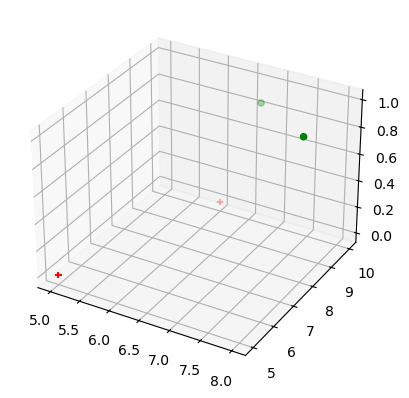

In [58]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(df2_placed["cgpa"],df2_placed["profile_score"],df2_placed["placed"],marker='o',color='green')
ax.scatter3D(df2_not_placed["cgpa"],df2_not_placed["profile_score"],df2_not_placed["placed"],marker='+',color='red')
plt.show()